In [13]:
"https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view"

'https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view'

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# Step 2: Descriptive Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


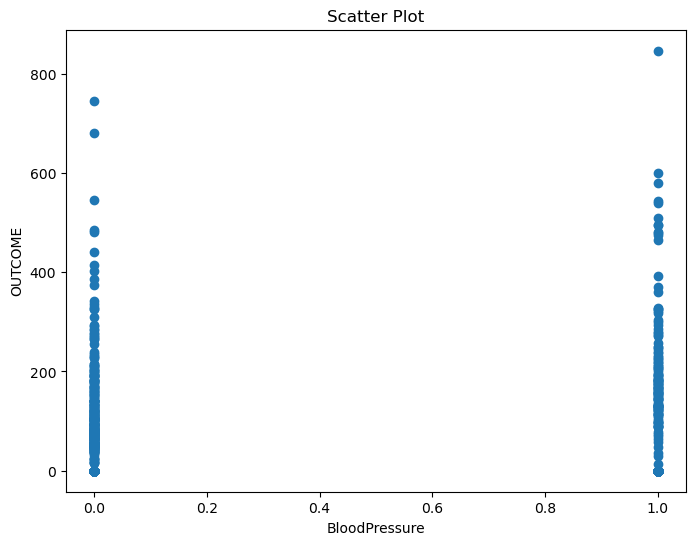

In [16]:
plt.figure(figsize=(8,6))

plt.scatter(data=df , x ='Outcome', y='Insulin')
plt.title('Scatter Plot')
plt.xlabel('BloodPressure')
plt.ylabel('OUTCOME')
plt.show()

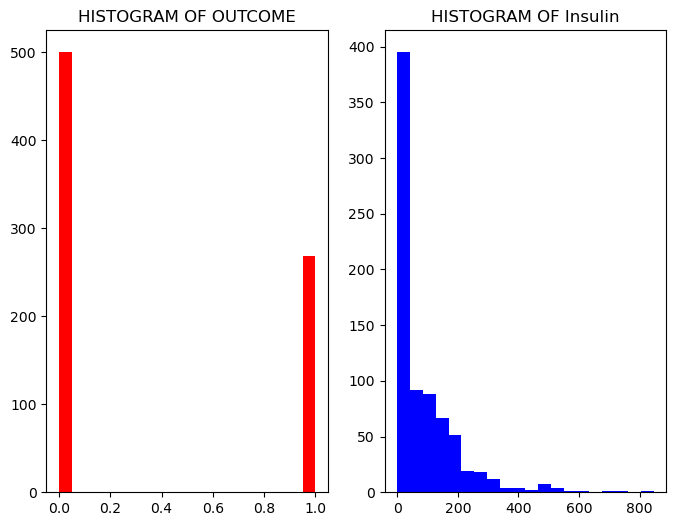

In [17]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.hist(df['Outcome'] , bins=20 , color='red')
plt.title('HISTOGRAM OF OUTCOME')

plt.subplot(1,2,2)
plt.hist(df['Insulin'] , bins=20 , color='Blue')
plt.title('HISTOGRAM OF Insulin')

plt.show()

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

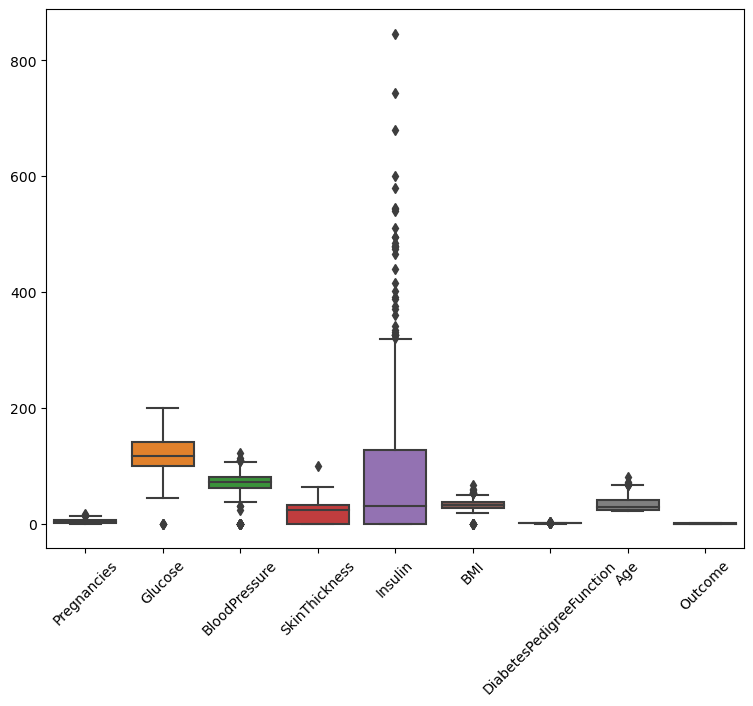

In [18]:
plt.figure(figsize=(9,7))

sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [19]:
df.shape

(768, 9)

##  remove outliear

In [20]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)

In [21]:
IQR = Q3 - Q1

In [22]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [23]:
upper_array = np.where(data['Insulin'] >= upper)[0]
lower_array = np.where(data['Insulin'] <= lower)[0]

df.drop(index=upper_array , inplace=True)
df.drop(index=lower_array , inplace=True)

In [24]:
df.shape

(734, 9)

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = df.drop('Outcome',axis=1)
y = df.Outcome

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [28]:
parameters = {
    "criterion" : ['gini' , 'entropy' , 'log_loss'],
    "splitter" : ['best' , 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12],
    "max_features" : ['auto' , 'sqrt' , 'log2']
}

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

model = GridSearchCV(DecisionTreeClassifier() , param_grid=parameters , cv=5)

In [34]:
model.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [37]:
new_model = model.best_estimator_

In [38]:
new_model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [41]:
from sklearn.metrics import accuracy_score

y_pred = new_model.predict(X_test)

accuracy = accuracy_score(y_pred , y_test)

print('Accuracy :',accuracy)

Accuracy : 0.7142857142857143


In [42]:
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix , roc_curve

In [43]:
print(precision_score(y_pred , y_test))

0.5833333333333334


In [44]:
print(recall_score(y_pred , y_test))

0.56


In [45]:
print(f1_score(y_pred , y_test))

0.5714285714285714


In [46]:
print(confusion_matrix(y_pred , y_test))

[[77 20]
 [22 28]]


In [47]:
print(roc_curve(y_pred , y_test))

(array([0.        , 0.20618557, 1.        ]), array([0.  , 0.56, 1.  ]), array([2, 1, 0]))


# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

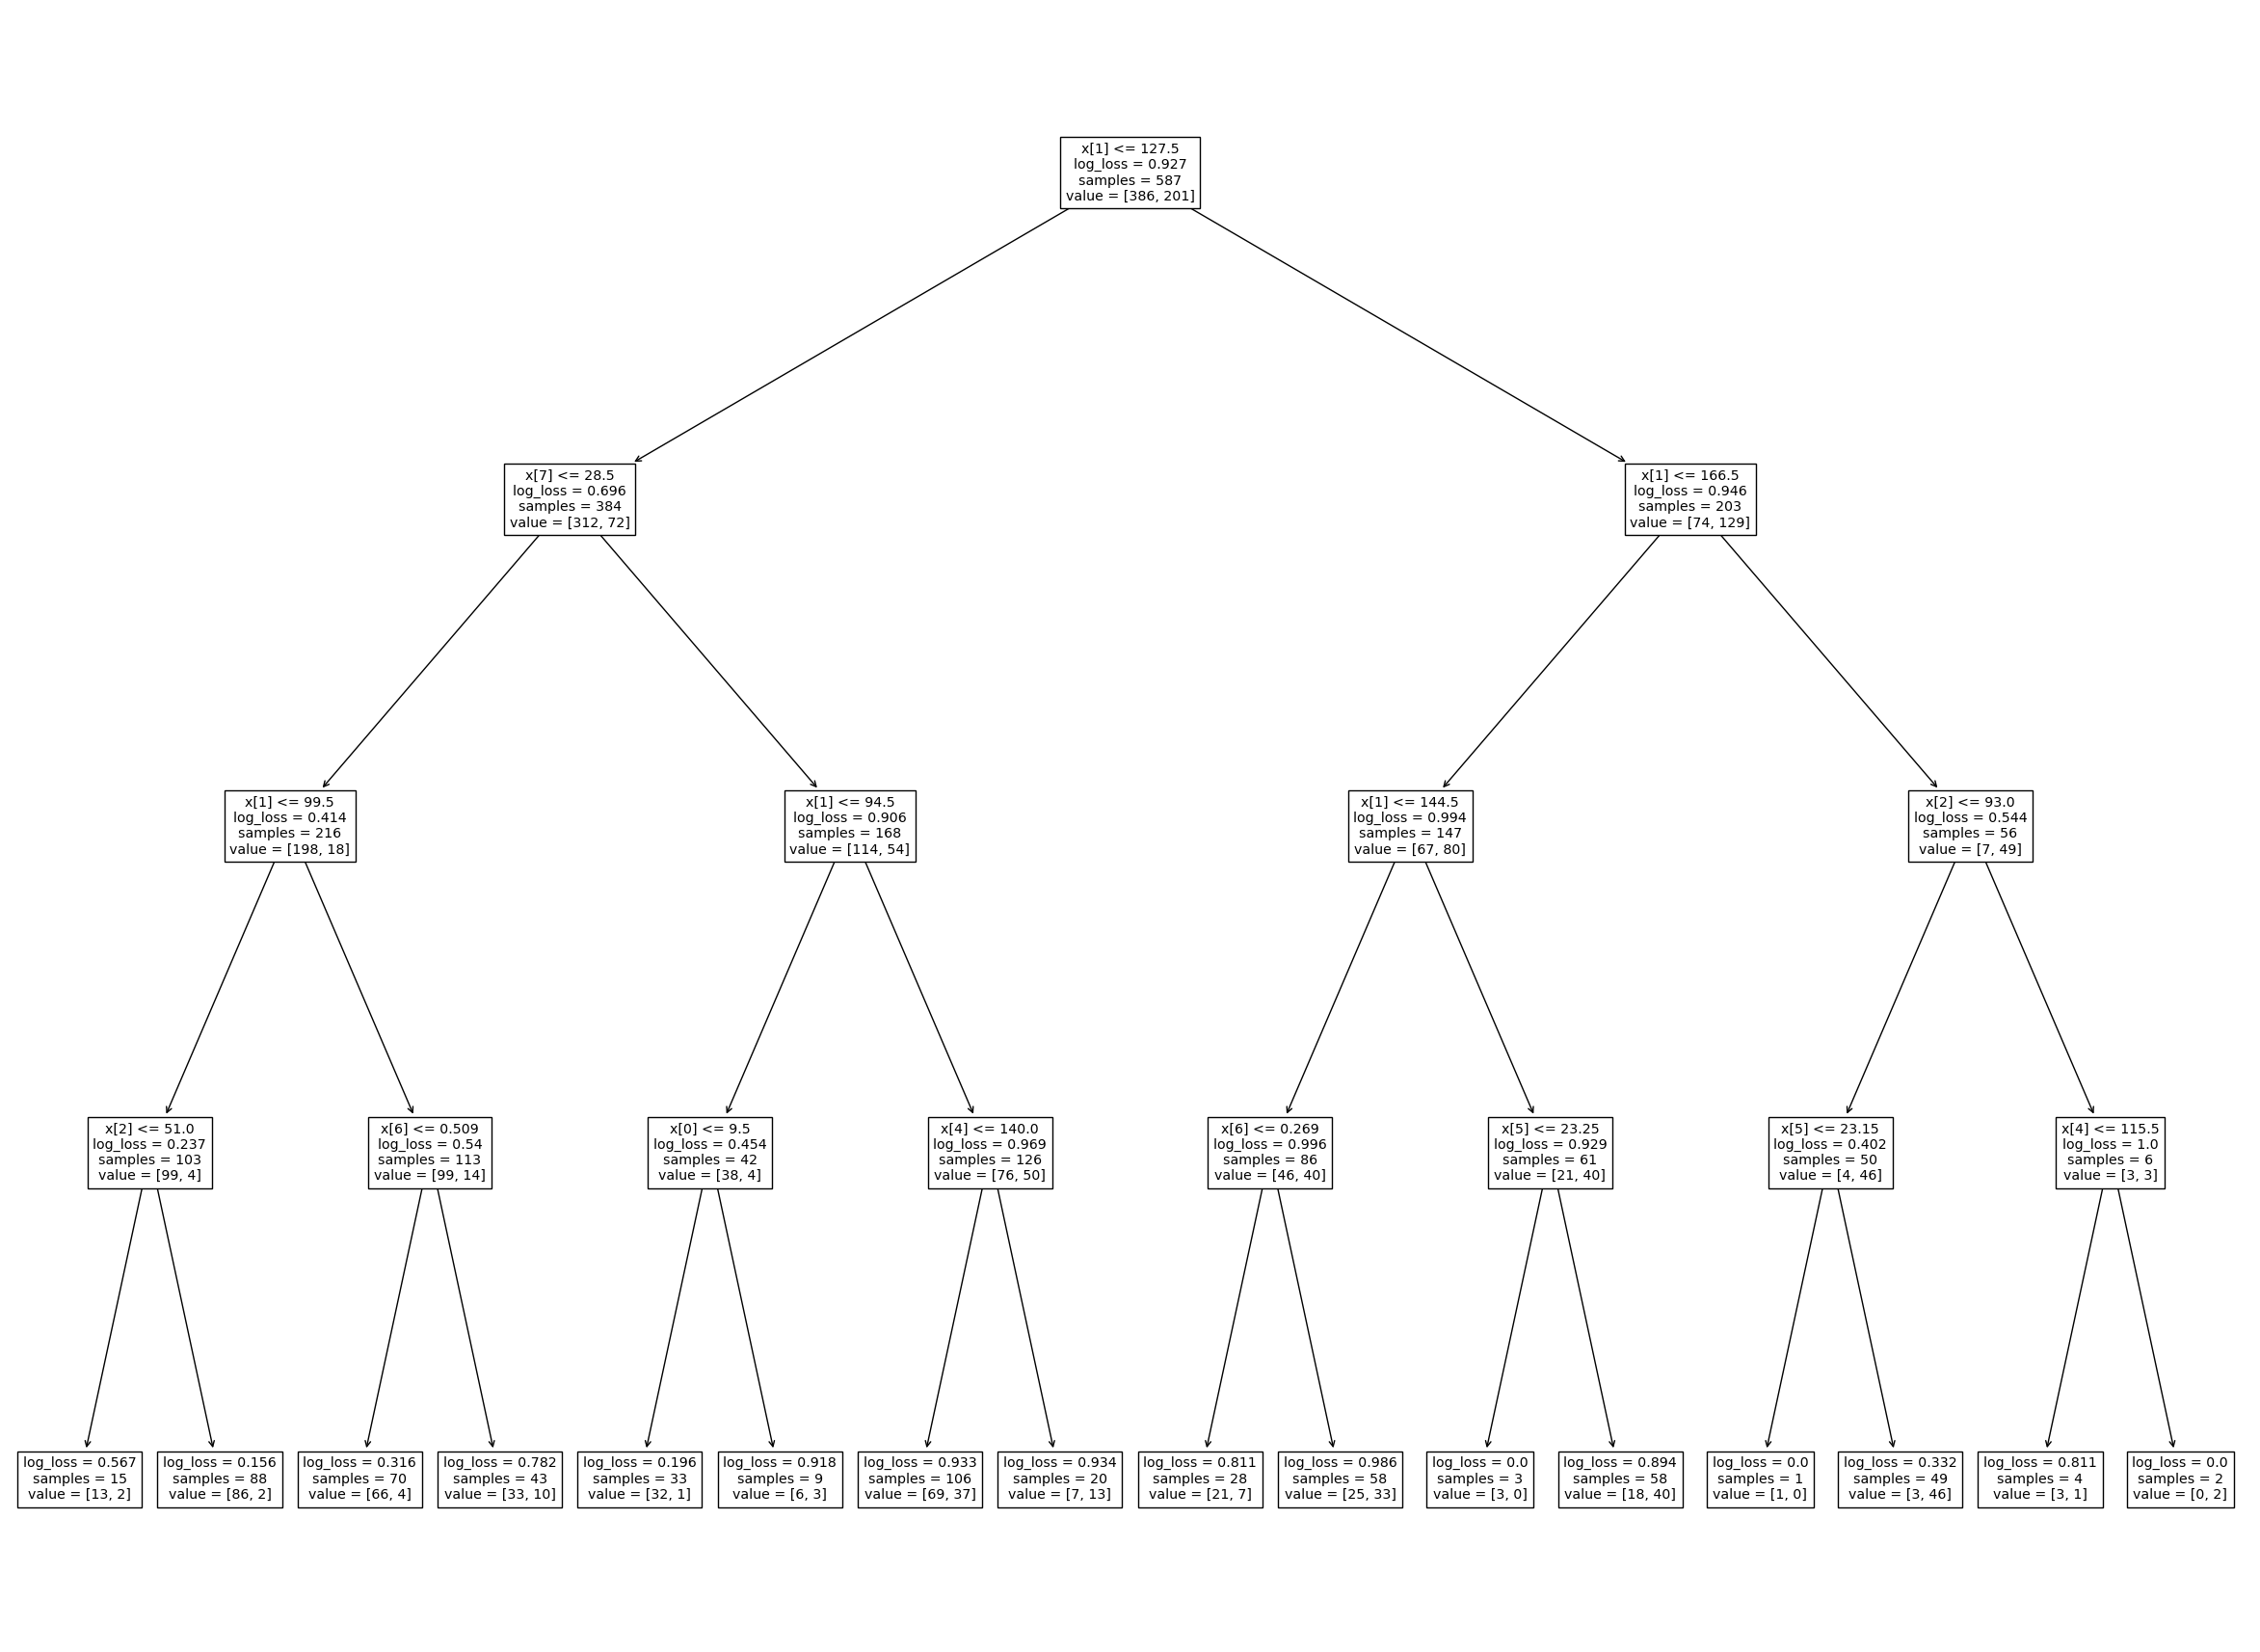

In [56]:
from sklearn import tree

plt.figure(figsize=(30,22))
tree.plot_tree(new_model)

plt.show()

In [77]:
importance = new_model.feature_importances_
feature_names = df.columns

In [78]:
most_imp_index = importances.argmax()
most_imp_varieble = feature_names[most_imp_index]

threshold = new_model.tree_.threshold[most_important_index]

print(f"The most important variable is '{most_imp_varieble}' with a threshold of {threshold}.")

The most important variable is 'Glucose' with a threshold of 28.5.


# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [83]:
Y_pred = new_model.predict(X_test)

In [86]:
print(accuracy_score(Y_pred , y_test))

0.7860082304526749


In [87]:
print(confusion_matrix(Y_pred , y_test))

[[130  29]
 [ 23  61]]


## Assuming 'new_data' is your new dataset
new_predictions = clf.predict(new_data)
Evaluate Model Performance:

Calculate relevant metrics (e.g., accuracy, precision, recall, F1-score) to assess how well the model performs on the new data.
python
Copy code
from sklearn.metrics import classification_report, accuracy_score

## Assuming 'new_labels' are the true labels for the new data
accuracy = accuracy_score(new_labels, new_predictions)
report = classification_report(new_labels, new_predictions)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
Sensitivity Analysis:

Conduct sensitivity analysis to understand how changes in input variables impact the model's predictions. This can involve varying the input values within a range and observing the effect on the output.
Scenario Testing:

Test the model under different scenarios or conditions. This could involve changing specific features or introducing outliers to see how the model responds.
Robustness Assessment:

Assess the model's performance under different conditions (e.g., noisy data, missing values, different distributions) to evaluate its robustness.
Record and Analyze Results:

Document the results of the sensitivity analysis and scenario testing. Pay attention to any cases where the model may not perform as expected.
Iterate and Fine-Tune:

Based on the results, consider whether any adjustments to the model or its parameters are needed. This might involve re-training the model with additional data or fine-tuning hyperparameters.